<a href="https://colab.research.google.com/github/victoriahebling/ANN/blob/main/Trabalho2_RedesNeurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
print('\033[1;37;44mTrabalho 2 - Disciplina: Tópicos Especiais em Engenharia Bioquímica II: Redes neurais aplicadas a Engenharia Química \n\nAluna: Victória Hebling Arroyo\033[m')


Trabalho 2 - Disciplina: Tópicos Especiais em Engenharia Bioquímica II: Redes neurais aplicadas a Engenharia Química 

Aluna: Victória Hebling Arroyo


In [10]:
print('BANCO DE DADOS CONTENDO FOTOS DE FRUTAS')
print('Fonte: https://www.kaggle.com/chrisfilo/fruit-recognition')


BANCO DE DADOS CONTENDO FOTOS DE FRUTAS
Fonte: https://www.kaggle.com/chrisfilo/fruit-recognition


In [11]:
from keras.models import Sequential
'''sequential significa que vai montar a rede neural etapa por etapa'''

from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
'''dentro do keras.layers estamos carregando dense, activation e etc.. para montar as 
camadas da rede neural'''

import numpy as np
'''O NumPy é uma biblioteca para a linguagem Python com funções 
para se trabalhar com computação numérica. Neste caso estamos 
chamando numpy de np para economizar tempo na digitação deste código'''

import pandas as pd
'''Pandas é um biblioteca para manipulação e análise de dados. 
Neste caso estamos chamando pandas de pd para economizar tempo 
na digitação deste código'''

import cv2
'''computer vision, biblioteca que trabalha com processamento de imagem'''

import random
'''Este módulo implementa geradores de números pseudoaleatórios para várias 
distribuições.'''

import zipfile
'''Este módulo fornece ferramentas para criar, ler, escrever, adicionar, 
e listar um arquivo ZIP.'''

from matplotlib import pyplot as plt
'''Matplotlib.pyplot serve para plotar gráficos, sendo que esta
biblioteca permite a personalização dos gráficos, tais como: tamanho
da figura, largura da linha, cor, estilo e etc...'''

from sklearn.svm import SVC
'''Uma máquina de vetores de suporte (SVM, do inglês: support vector machine) é 
um conceito na ciência da computação para um conjunto de métodos de aprendizado
 supervisionado que analisam os dados e reconhecem padrões, sendo usado neste 
 caso para fazer classificação (SVC, do inglês: Support Vector Classification)'''

from sklearn import preprocessing
'''o preprocessing é usado para fazer normatização os dados'''

from sklearn.model_selection import train_test_split
''' serve para separar os dados em treino e o teste'''

from sklearn.metrics import classification_report
'''serve para criar um relatório das métricas'''


'serve para criar um relatório das métricas'

In [12]:
#clonando os dados que estão na pasta ANN do github
!git clone https://github.com/victoriahebling/ANN
%cd ANN

Cloning into 'ANN'...
remote: Enumerating objects: 178, done.
remote: Counting objects: 100% (178/178), done.
remote: Compressing objects: 100% (173/173), done.
remote: Total 178 (delta 64), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (178/178), 122.51 MiB | 27.06 MiB/s, done.
Resolving deltas: 100% (64/64), done.
/content/Machine_Learning_DataSet/ANN


In [13]:
Arq =['Banana.zip','Orange.zip','Peach.zip','Pitaya.zip']
'''dentro da pasta ANN no github, iremos selecionar 4 zips, sendo que cada
zip contém fotos de determinado tipo de fruta'''

img_name=[]      #lista vazia para armazenar os nomes das fotos
x_gray=[]        #lista vazia para fotos em preto e branco
x_original = []  #lista vazia para fotos em cores originais
for FILE in Arq: #para cada zip presente na lista Arq tem-se:
  file_name = zipfile.ZipFile(FILE, 'r')  #r, do inglês read, ou seja esta linha está lendo oa arquivo zip
  file_name.extractall() 
  with zipfile.ZipFile(FILE, "r") as f:  #vai descompactar
      for name in f.namelist(): #vai recuperar o nome da foto
          img_name.append(name) #vai armazenar o nome da foto na lista img_name

In [14]:
print(img_name)

['Banana01.png', 'Banana02.png', 'Banana03.png', 'Banana04.png', 'Banana05.png', 'Banana06.png', 'Banana07.png', 'Banana08.png', 'Banana09.png', 'Banana010.png', 'Banana011.png', 'Banana012.png', 'Banana013.png', 'Banana014.png', 'Banana015.png', 'Banana016.png', 'Banana017.png', 'Banana018.png', 'Banana019.png', 'Banana020.png', 'Banana021.png', 'Banana022.png', 'Banana023.png', 'Banana024.png', 'Banana025.png', 'Banana026.png', 'Banana027.png', 'Banana028.png', 'Banana029.png', 'Banana030.png', 'Banana031.png', 'Banana032.png', 'Banana033.png', 'Banana034.png', 'Banana035.png', 'Banana036.png', 'Banana037.png', 'Banana038.png', 'Banana039.png', 'Banana040.png', 'Banana041.png', 'Banana042.png', 'Banana043.png', 'Banana044.png', 'Banana045.png', 'Banana046.png', 'Banana047.png', 'Banana048.png', 'Banana049.png', 'Banana050.png', 'Orange001.png', 'Orange002.png', 'Orange003.png', 'Orange004.png', 'Orange005.png', 'Orange006.png', 'Orange007.png', 'Orange008.png', 'Orange009.png', 'Oran

In [15]:
y_names = []
for yy in img_name:    #para cada nome presente na lista img_name
  name = yy[1]+yy[1]+yy[3]
  y_names.append(name)

In [16]:
unique_list = []    
for yy in y_names:
  if yy not in unique_list:
    unique_list.append(yy)

In [17]:
print(unique_list)

['aaa', 'rrn', 'eec', 'iia']


In [18]:
n = len(unique_list)
y = []
for yy in y_names:
  for i in range(n):
    if(yy == unique_list[i]):
      y.append(i)

In [19]:
DATASET_SIZE = len(y_names)
Ind = range(DATASET_SIZE)
Img_Size = 80
num_range = DATASET_SIZE

In [20]:
Ind_train, Ind_test= train_test_split(Ind,test_size=0.20, shuffle=True, random_state=3)

In [21]:
X_train = []
Y_train = []
for II in Ind_train:
  name = img_name[II]
  X_train.append(cv2.resize(cv2.imread(name),(Img_Size,Img_Size)))
  # X_train.append(cv2.imread(name))
  Y_train.append(y[II])

In [22]:
X_test= []
Y_test = []
i =0
for II in Ind_test:
  name = img_name[II]
  #X_test.append(cv2.imread(name))
  X_test.append(cv2.resize(cv2.imread(name),(Img_Size,Img_Size)))
  Y_test.append(y[II])

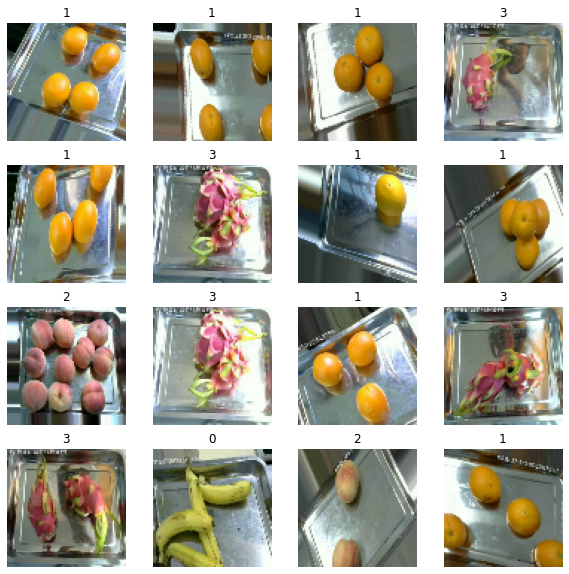

In [23]:
# view some images from the train_ds
# num,cols,dim = np.array(X_train[0]).shape
num = len(Y_train)
plt.figure(figsize=(10, 10))
for i in range(16):
  ax = plt.subplot(4, 4, i + 1)
  kk = int(random.randrange(num))
  RGB_img = cv2.cvtColor(X_train[kk], cv2.COLOR_BGR2RGB)
  plt.imshow(RGB_img)
  plt.title(Y_train[kk])
  plt.axis("off")

In [24]:
num

160

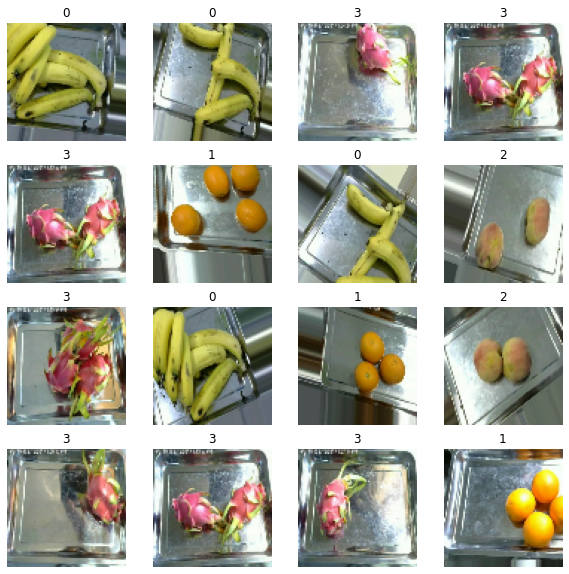

In [25]:
# view some images from the train_ds
# num,- = np.array(X_test).shape
num = len(Y_test)
plt.figure(figsize=(10, 10))
for i in range(16):
  ax = plt.subplot(4, 4, i + 1)
  kk = int(random.randrange(num))
  RGB_img = cv2.cvtColor(X_test[kk], cv2.COLOR_BGR2RGB)
  plt.imshow(RGB_img)
  plt.title(Y_test[kk])
  plt.axis("off")

In [26]:
X_new = []
for XX in X_train:
  X_new.append(XX)
print(XX)
X_train = X_new.copy()

X_new = []
for XX in X_test:
  X_new.append(XX)

X_test = X_new.copy()

[[[101  95  66]
  [103  97  68]
  [109 102  71]
  ...
  [107 118 105]
  [ 81  89  65]
  [ 82  92  66]]

 [[101  95  66]
  [103  97  68]
  [109 102  71]
  ...
  [171 171 184]
  [158 165 155]
  [ 84  91  70]]

 [[101  95  66]
  [103  97  68]
  [118 111  80]
  ...
  [181 186 210]
  [184 198 201]
  [137 149 126]]

 ...

 [[104 108  97]
  [104 108  97]
  [104 108  97]
  ...
  [ 40  41  46]
  [ 38  38  44]
  [ 35  39  49]]

 [[104 108  97]
  [104 108  97]
  [104 108  97]
  ...
  [ 40  41  46]
  [ 38  38  44]
  [ 35  39  49]]

 [[104 108  97]
  [104 108  97]
  [104 108  97]
  ...
  [ 40  41  46]
  [ 38  38  44]
  [ 35  39  49]]]


In [27]:
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

In [28]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))
# X_train = X_train.reshape(-1, Img_Size, Img_Size, 3) / 255.0
X_train = X_train /255.0
Y_train = Y_train.astype(np.int32)
#Y_train = Y_train.reshape(1,-1)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)
# X_test = X_test.reshape(-1, Img_Size, Img_Size, 3) / 255.0
X_test = X_test /255.0
Y_test = Y_test.astype(np.int32)
#Y_test = Y_test.reshape(1,-1)
Y_test = ynindicator(Y_test)

In [29]:
X_train.shape

(160, 80, 80, 3)

In [30]:
# the model will be a sequence of layers

model = Sequential()


# make the CNN
# model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 3), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=200))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=100))
model.add(Activation('relu'))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [31]:
# gives us back a <keras.callbacks.History object at 0x112e61a90>
r = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=15, batch_size=32)
print("Returned:", r)

Epoch 1/15
5/5 [==============================] - 23s 753ms/step - loss: 5.1284 - accuracy: 0.2585 - val_loss: 1.3616 - val_accuracy: 0.3500
Epoch 2/15
5/5 [==============================] - 3s 529ms/step - loss: 1.9638 - accuracy: 0.5480 - val_loss: 1.4163 - val_accuracy: 0.4000
Epoch 3/15
5/5 [==============================] - 3s 510ms/step - loss: 1.3178 - accuracy: 0.5875 - val_loss: 1.4291 - val_accuracy: 0.1750
Epoch 4/15
5/5 [==============================] - 3s 529ms/step - loss: 0.6535 - accuracy: 0.7032 - val_loss: 1.3927 - val_accuracy: 0.5000
Epoch 5/15
5/5 [==============================] - 3s 526ms/step - loss: 0.4327 - accuracy: 0.8409 - val_loss: 1.2464 - val_accuracy: 0.6000
Epoch 6/15
5/5 [==============================] - 3s 520ms/step - loss: 0.2336 - accuracy: 0.9036 - val_loss: 1.1694 - val_accuracy: 0.5750
Epoch 7/15
5/5 [==============================] - 3s 531ms/step - loss: 0.1554 - accuracy: 0.9619 - val_loss: 1.1834 - val_accuracy: 0.5500
Epoch 8/15
5/5 [===

In [32]:
Img_Size

80

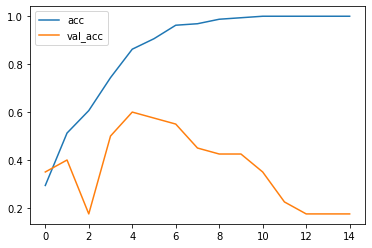

In [33]:
# plot some data
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

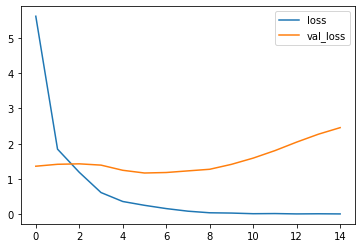

In [34]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()